Author : Clara Martinez

## Data Analysis : Week2 Day 5

*Daily Challenge : Exploring the world hapiness report with matplotlib*

Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

Dataset

In [10]:
df = pd.read_csv('world-happiness-report-2019.csv')

Exploration

In [11]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [13]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [15]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [ ]:
df = df.dropna()


In [17]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

*Scatter plot for 'Social support' vs. 'Life expectancy'*

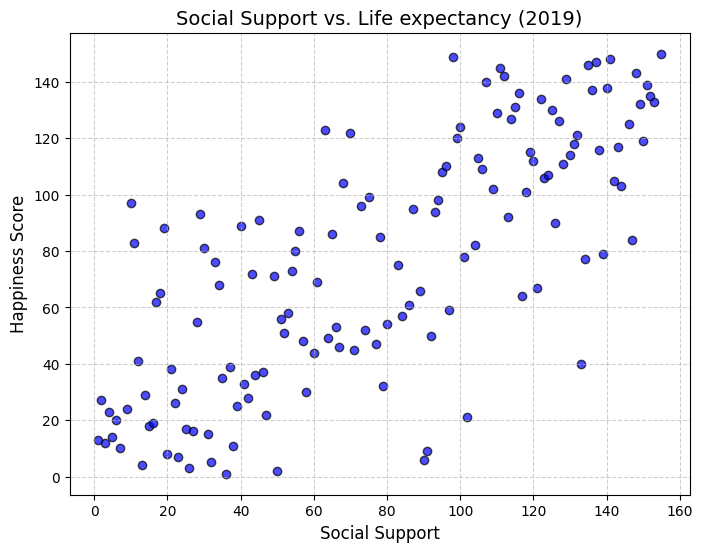

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Social support'], df['Healthy life\nexpectancy'], alpha=0.7, c='blue', edgecolors='k')
plt.title("Social Support vs. Life expectancy (2019)", fontsize=14)
plt.xlabel("Social Support", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

*Regional Comparisons of GDP and Health*

In [19]:
region_group = df.groupby('Country (region)')[['Log of GDP\nper capita', 'Healthy life\nexpectancy']].mean().reset_index()

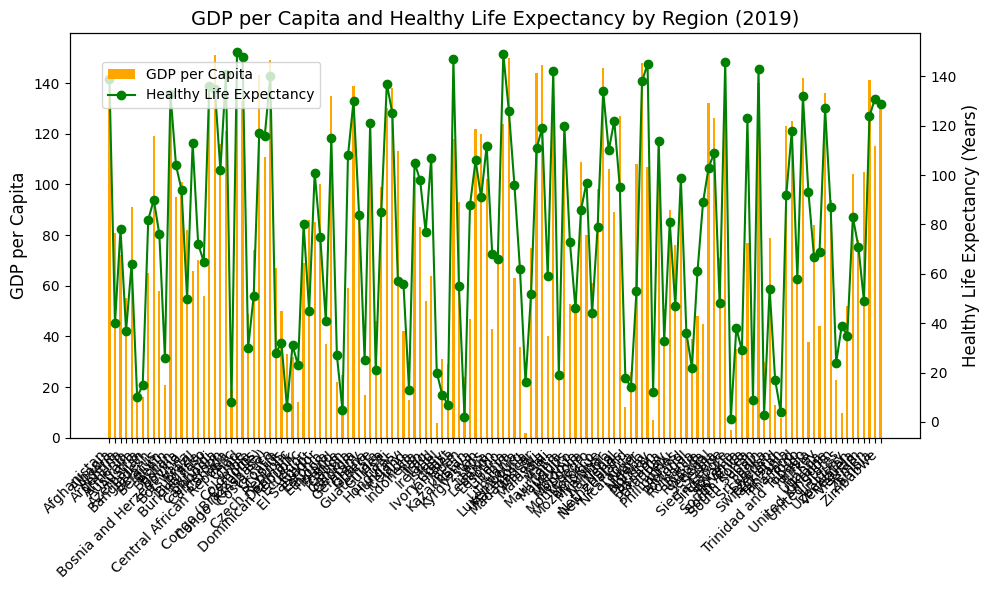

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.4
bar_positions = range(len(region_group['Country (region)']))
ax1.bar(bar_positions, region_group['Log of GDP\nper capita'], color='orange', width=bar_width, label='GDP per Capita')
ax1.set_ylabel("GDP per Capita", fontsize=12)
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(region_group['Country (region)'], rotation=45, ha='right', fontsize=10)
ax1.set_title("GDP per Capita and Healthy Life Expectancy by Region (2019)", fontsize=14)


ax2 = ax1.twinx()
ax2.plot(bar_positions, region_group['Healthy life\nexpectancy'], color='green', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel("Healthy Life Expectancy (Years)", fontsize=12)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()